<a href="https://colab.research.google.com/github/noahruiz416/Airline_On_Time_AZ_Market/blob/main/Airline_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis, analyzing airline on time performance data in the Arizona region. Focused on Tuscon and Phoenix airports. Data ranges from 2003 - 2020.

### The data itself was pulled from a google cloud sql server and was queried through bigQuery in order to reduce computation time.

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive 
import scipy
from scipy import stats
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
airline_aggr_data = pd.read_csv("gdrive/My Drive/bq-results-20220226-154935-8t4st3sl5exn/ad.csv")

In [ ]:
airline_aggr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324171 entries, 0 to 1324170
Data columns (total 26 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1324171 non-null  int64  
 1   Quarter            1324171 non-null  int64  
 2   Month              1324171 non-null  int64  
 3   DayOfMonth         1324171 non-null  int64  
 4   DayOfWeek          1324171 non-null  int64  
 5   FlightDate         1324171 non-null  object 
 6   Reporting_Airline  1324171 non-null  object 
 7   ORIGIN             1324171 non-null  object 
 8   OriginCityName     1324171 non-null  object 
 9   OriginState        1324171 non-null  object 
 10  DestState          1324171 non-null  object 
 11  DestStateName      1324171 non-null  object 
 12  DepDelay           1324171 non-null  int64  
 13  DepDelayMinutes    1324171 non-null  int64  
 14  WheelsOn           1324169 non-null  float64
 15  TaxiOut            1324171 non-n

In [ ]:
#normalizing our variables of interest to be graphed
x_vars = airline_aggr_data[['DepDelay', 'WheelsOn', 'TaxiIn', 'TaxiOut', 
                           'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
                           'SecurityDelay', 'LateAircraftDelay', 'ArrDelay']]
normalized_df=(x_vars-x_vars.mean())/x_vars.std()

In [ ]:
#correlation matrix to explore a possible correlations between potential x variables and arrival delay
#I suggest looking at the bottom row to analyze arrival delay
x_vars.corr()

,DepDelay,WheelsOn,TaxiIn,TaxiOut,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay
DepDelay,1.000000,-0.006497,-0.060888,-0.147766,0.009061,0.650859,0.170504,0.070382,0.032131,0.526744,0.951200
WheelsOn,-0.006497,1.000000,-0.011158,-0.066515,0.003127,-0.065875,-0.017852,0.002342,-0.003292,-0.021845,-0.017668
TaxiIn,-0.060888,-0.011158,1.000000,0.027213,0.119709,-0.054336,0.017804,0.271561,-0.006311,-0.063189,0.051754
TaxiOut,-0.147766,-0.066515,0.027213,1.000000,0.077011,-0.068985,0.028910,0.373002,0.000044,-0.152644,0.031309
Distance,0.009061,0.003127,0.119709,0.077011,1.000000,0.003827,-0.006399,0.154076,0.005991,-0.071853,0.036329
CarrierDelay,0.650859,-0.065875,-0.054336,-0.068985,0.003827,1.000000,-0.034580,-0.144698,-0.022788,-0.129623,0.641000
WeatherDelay,0.170504,-0.017852,0.017804,0.028910,-0.006399,-0.034580,1.000000,-0.005892,-0.004447,-0.020929,0.186989
NASDelay,0.070382,0.002342,0.271561,0.373002,0.154076,-0.144698,-0.005892,1.000000,-0.014842,-0.152418,0.235056
SecurityDelay,0.032131,-0.003292,-0.006311,0.000044,0.005991,-0.022788,-0.004447,-0.014842,1.000000,-0.011596,0.030885
LateAircraftDelay,0.526744,-0.021845,-0.063189,-0.152644,-0.071853,-0.129623,-0.020929,-0.152418,-0.011596,1.000000,0.493635


## Here we begin the EDA Process, by creating multiple scatter plots, each exploring some the x variables which I believe will aid in the creation of a predictive model due to the strong coefficient values, each of the x variables exhibit

Text(0.5, 1.0, 'NAS_DELAY')

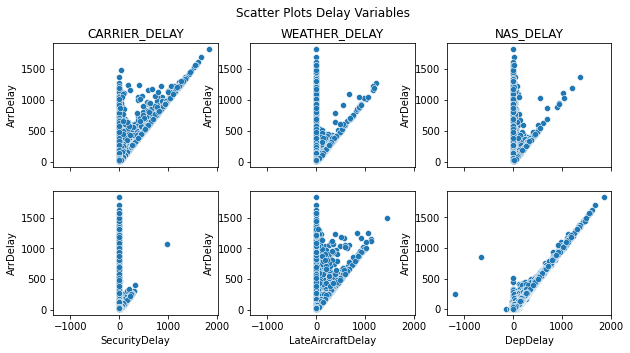

In [ ]:
#Aggregated Scatter Plots
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(10,5))
figure.suptitle('Scatter Plots Delay Variables')
sns.set_style("darkgrid")
sns.scatterplot(ax=axes[0, 0], data=airline_aggr_data, x='CarrierDelay', y='ArrDelay')
sns.scatterplot(ax=axes[0, 1], data=airline_aggr_data, x='WeatherDelay', y='ArrDelay')
sns.scatterplot(ax=axes[0, 2], data=airline_aggr_data, x='NASDelay', y='ArrDelay')
sns.scatterplot(ax=axes[1, 0], data=airline_aggr_data, x='SecurityDelay', y='ArrDelay')
sns.scatterplot(ax=axes[1, 1], data=airline_aggr_data, x='LateAircraftDelay', y='ArrDelay')
sns.scatterplot(ax=axes[1, 2], data=airline_aggr_data, x='DepDelay', y='ArrDelay')
axes[0, 0].set_title('CARRIER_DELAY')
axes[0, 1].set_title('WEATHER_DELAY')
axes[0, 2].set_title('NAS_DELAY')

## After graphing scatter plots, probability distributions were created with the normalized version of the dataframe. As you can see below the majority of the delay times have a very right skewed distribution. For the airlines, this is a positive insight, showing that most delay times are short.

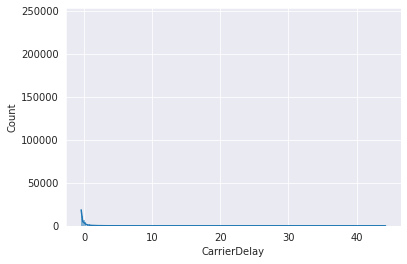

In [ ]:
sns.histplot(data=normalized_df, x='CarrierDelay', kde=True)

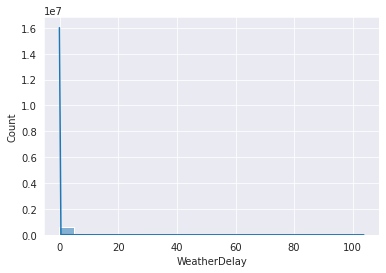

In [ ]:
sns.histplot(data=normalized_df, x='WeatherDelay', kde=True)

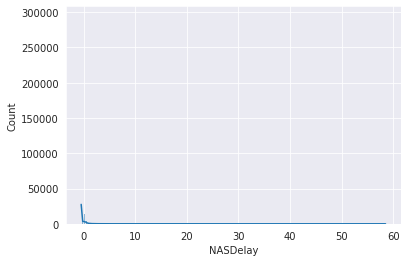

In [ ]:
sns.histplot(data=normalized_df, x='NASDelay', kde=True)

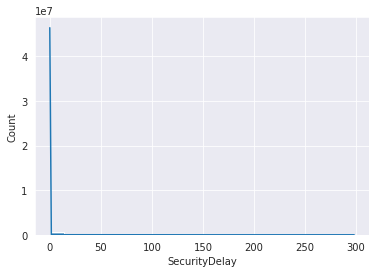

In [ ]:
sns.histplot(data=normalized_df, x='SecurityDelay',kde=True)

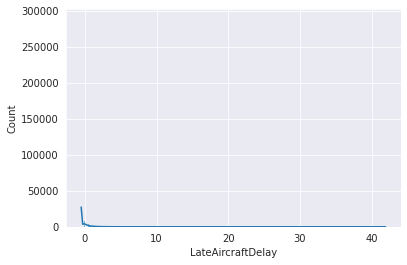

In [ ]:
sns.histplot(data=normalized_df, x='LateAircraftDelay', kde=True)

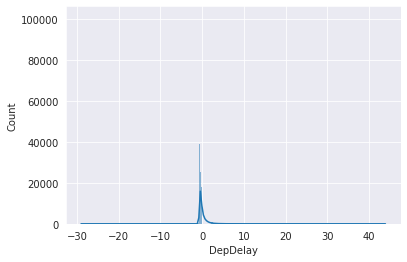

In [ ]:
sns.histplot(data=normalized_df, x='DepDelay', kde=True)

Text(0.5, 1.0, 'NAS_DELAY')

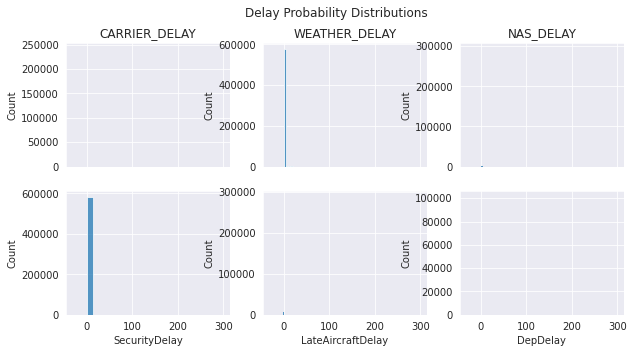

In [ ]:
#this block of code creates a large summation of the plots created above
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(10,5))
figure.suptitle('Delay Probability Distributions')
sns.set_style("darkgrid")
sns.histplot(ax=axes[0, 0], data=normalized_df, x='CarrierDelay')
sns.histplot(ax=axes[0, 1], data=normalized_df, x='WeatherDelay')
sns.histplot(ax=axes[0, 2], data=normalized_df, x='NASDelay')
sns.histplot(ax=axes[1, 0], data=normalized_df, x='SecurityDelay')
sns.histplot(ax=axes[1, 1], data=normalized_df, x='LateAircraftDelay')
sns.histplot(ax=axes[1, 2], data=normalized_df, x='DepDelay')
axes[0, 0].set_title('CARRIER_DELAY')
axes[0, 1].set_title('WEATHER_DELAY')
axes[0, 2].set_title('NAS_DELAY')

## Finally Basic Box Plots are Created to, view if any outliers lie well outside the upper or lower limit of each respective x variable.

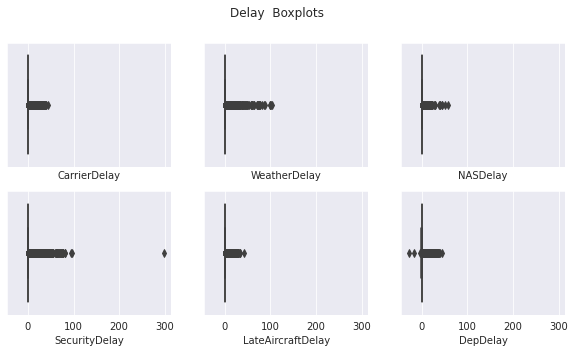

In [ ]:
sns.set_style("darkgrid")
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(10,5))
figure.suptitle('Delay  Boxplots')
sns.boxplot(ax=axes[0, 0], data=normalized_df, x='CarrierDelay')
sns.boxplot(ax=axes[0, 1], data=normalized_df, x='WeatherDelay')
sns.boxplot(ax=axes[0, 2], data=normalized_df, x='NASDelay')
sns.boxplot(ax=axes[1, 0], data=normalized_df, x='SecurityDelay')
sns.boxplot(ax=axes[1, 1], data=normalized_df, x='LateAircraftDelay')
sns.boxplot(ax=axes[1, 2], data=normalized_df, x='DepDelay')

## In the next few cells we conduct an analysis on the performance of indivudal airlines and plot a basic time series 

In [ ]:
#5 most frequent airlines, with arrival delay times
airline_aggr_data['Reporting_Airline'].value_counts(normalize=True).head(5)

WN    0.367934
US    0.183378
AA    0.104505
YV    0.079303
HP    0.073627
Name: Reporting_Airline, dtype: float64

### From one take, we can see that there is a clear similarity between arrival delays and departure delays from looking at the time series graph. Additionally, arrival delay frequencies have increased rapidly in the past years

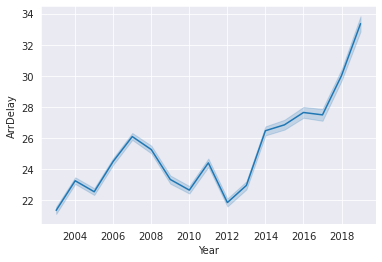

In [ ]:
sns.lineplot(x = 'Year', y = 'ArrDelay', data =airline_aggr_data)

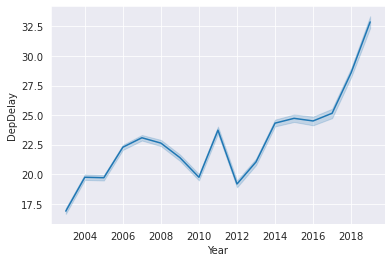

In [ ]:
sns.lineplot(x = 'Year', y = 'DepDelay', data =airline_aggr_data)

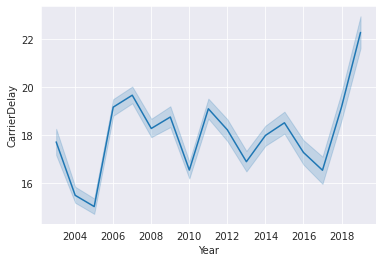

In [ ]:
sns.lineplot(x = 'Year', y = 'CarrierDelay', data=airline_aggr_data)